Обзор архитектуры DeepLabV3+
https://arxiv.org/pdf/1606.00915.pdf

Основные отличительные особенности архитектуры:
 - "разбавленные свертки" (Dilated Convolution). DeepLab использует расширенные свертки для сбора разномасштабной контекстной информации без увеличения вычислительных затрат. Традиционные сверточные слои имеют фиксированный размер рецептивного поля, что ограничивает их способность захватывать как локальный, так и глобальный контекст. Расширенные свертки вводят промежутки между фильтрующими элементами, что позволяет им покрывать большие площади, сохраняя при этом постоянные вычислительные затраты. Используя параллельно расширенные свертки с разной скоростью расширения, DeepLab может эффективно собирать многомасштабную информацию.
 -Atrous Spatial Pyramid Pooling (ASPP): ASPP является важным компонентом архитектуры DeepLab, который еще больше расширяет возможности захвата разномасштабного контекста. Он состоит из параллельных расширенных свертков с разной скоростью расширения, за которыми следует объединение глобальных средних значений. Параллельные расширенные свертки захватывают контекст в нескольких масштабах, в то время как глобальное среднее объединение объединяет информацию из всего изображения. Затем результаты этих операций объединяются и обрабатываются с помощью сверток 1x1 для получения окончательного представления функции.
 - Структура энкодер-декодер: DeepLab использует структуру энкодер-декодер для уточнения результатов сегментации. Сеть кодировщика извлекает высокоуровневые признаки из входного изображения, в то время как сеть декодера повышает дискретизацию этих признаков для создания плотных попиксельных прогнозов. Сеть декодера состоит из билинейной повышающей дискретизации, за которой следуют свертки 1x1 для уменьшения артефактов алиасинга и улучшения пространственного разрешения прогнозов.

Преимущества архитектуры DeepLab:
 - Высокая точность: DeepLab достигает высокой точности в задачах семантической сегментации изображений. Эта архитектура хорошо различает мелкозернистые детали и сложные границы.
 - Эффективное плотное прогнозирование: DeepLab использует atrous convolution,  или расширенная свертка, что позволяет подавать модели на вход карты признаков высокого разрешения, без уменьшения дискретизации карт объектов. При этом разрешение картинки-предсказания соответствует разрешению оригинала. таким образом DeepLab позволяет избежать потери деталей, которая может произойти при использовании традиционных методов, основанных на понижающей дискретизации.
 - Многомасштабное объединение объектов: DeepLab использует технику, называемую "atrous spatial pyramid pooling" (ASPP), которая собирает многомасштабную информацию с разных уровней расширенных свертков. ASPP использует параллельные жесткие свертки с различной скоростью расширения и объединяет их выходные данные путем объединения или суммирования. Это позволяет модели эффективно объединять объекты в нескольких масштабах, повышая ее способность обрабатывать объекты разных размеров и охватывать как локальный, так и глобальный контекст.
 - Эффективный вывод: DeepLab использует полностью сверточные сети (FCN), которые обеспечивают условно быстрый вывод прогноза за счет обработки всего изображения за один прямой проход. Это делает DeepLab теоритически подходящим для приложений реального времени, поскольку он может быстро обрабатывать изображения без необходимости сложных шагов постобработки.
 - Адаптивность: DeepLab легко адаптируется и может применяться к различным областям и задачам. Эта архитектура используется для разметки медицинских изображений, спутниковых снимков, в автомобильном "автопилоте".
 - Доступность предтренированных моделей. В сети легко найти модель, предобученную на больших массивах данных, таких как COCO или PASCAL VOC.

Можно выделить следующие недостатки DeepLab:
 - Высокая нагрузга на ЦПУ (или ГПУ), большие затраты памяти. Из-за большого количества параметров
 - Ограниченная информация о контексте: DeepLab опирается на информацию о локальном контексте, захваченную рецептивными полями своих сверточных фильтров. Хотя этот подход эффективен для захвата мелких деталей, он может вызывать затруднения при захвате долговременных зависимостей и информации глобального контекста. Следовательно, DeepLab может столкнуться с трудностями при точной сегментации объектов, которые охватывают большие области или имеют сложные контекстуальные отношения.
 - Сложность обработки дисбаланса классов: задачи семантической сегментации изображения часто страдают от дисбаланса классов, когда одни классы представлены недостаточно по сравнению с другими. Эта проблема может повлиять на учебный процесс DeepLab, поскольку модель имеет тенденцию отдавать приоритет изучению доминирующих классов, пытаясь уловить нюансы классов меньшинства. Для устранения дисбаланса классов требуются тщательные методы предварительной обработки данных или модификации функции потерь во время обучения.
 - Отсутствие пространственной согласованности: DeepLab выполняет семантическую сегментацию независимо для каждого пикселя без явного применения ограничений пространственной согласованности. В результате могут возникать сегментации с несогласованными границами или фрагментированные области, которые не соответствуют границам объекта. Методы постобработки могут решить эту проблему, но приведут к дополнительным вычислительным затратам.
 - ограниченное распознавание объектов, слабо представленных в обучающей выборке.

In [1]:
import os
import cv2
import numpy as np
from glob import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
!gdown "1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz&confirm=t"
!unzip -q instance-level-human-parsing.zip

Downloading...
From: https://drive.google.com/uc?id=1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz&confirm=t
To: /content/instance-level-human-parsing.zip
100% 2.91G/2.91G [00:28<00:00, 104MB/s]


In [3]:
IMAGE_SIZE = 512
BATCH_SIZE = 4
NUM_CLASSES = 20
DATA_DIR = "./instance-level_human_parsing/instance-level_human_parsing/Training"
NUM_TRAIN_IMAGES = 1000
NUM_VAL_IMAGES = 50

train_images = sorted(glob(os.path.join(DATA_DIR, "Images/*")))[:NUM_TRAIN_IMAGES]
train_masks = sorted(glob(os.path.join(DATA_DIR, "Category_ids/*")))[:NUM_TRAIN_IMAGES]
val_images = sorted(glob(os.path.join(DATA_DIR, "Images/*")))[
    NUM_TRAIN_IMAGES : NUM_VAL_IMAGES + NUM_TRAIN_IMAGES
]
val_masks = sorted(glob(os.path.join(DATA_DIR, "Category_ids/*")))[
    NUM_TRAIN_IMAGES : NUM_VAL_IMAGES + NUM_TRAIN_IMAGES
]


def read_image(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.image.decode_png(image, channels=1)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    else:
        image = tf.image.decode_png(image, channels=3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.keras.applications.resnet50.preprocess_input(image)
    return image


def load_data(image_list, mask_list):
    image = read_image(image_list)
    mask = read_image(mask_list, mask=True)
    return image, mask


def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
    return dataset


train_dataset = data_generator(train_images, train_masks)
val_dataset = data_generator(val_images, val_masks)

print("Train Dataset:", train_dataset)
print("Val Dataset:", val_dataset)

Train Dataset: <_BatchDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>
Val Dataset: <_BatchDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>


In [4]:
def convolution_block(
    block_input,
    num_filters=256,
    kernel_size=3,
    dilation_rate=1,
    padding="same",
    use_bias=False,
):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal(),
    )(block_input)
    x = layers.BatchNormalization()(x)
    return tf.nn.relu(x)


def DilatedSpatialPyramidPooling(dspp_input):
    dims = dspp_input.shape
    x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    out_pool = layers.UpSampling2D(
        size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]), interpolation="bilinear",
    )(x)

    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output

In [5]:
def DeeplabV3Plus(image_size, num_classes):
    model_input = keras.Input(shape=(image_size, image_size, 3))
    resnet50 = keras.applications.ResNet50(
        weights="imagenet", include_top=False, input_tensor=model_input
    )
    x = resnet50.get_layer("conv4_block6_2_relu").output
    x = DilatedSpatialPyramidPooling(x)

    input_a = layers.UpSampling2D(
        size=(image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]),
        interpolation="bilinear",
    )(x)
    input_b = resnet50.get_layer("conv2_block3_2_relu").output
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

    x = layers.Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    x = convolution_block(x)
    x = layers.UpSampling2D(
        size=(image_size // x.shape[1], image_size // x.shape[2]),
        interpolation="bilinear",
    )(x)
    model_output = layers.Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)
    return keras.Model(inputs=model_input, outputs=model_output)


model = DeeplabV3Plus(image_size=IMAGE_SIZE, num_classes=NUM_CLASSES)
model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

Epoch 1/25
250/250 [==============================] - 158s 386ms/step - loss: 1.1703 - accuracy: 0.6470 - val_loss: 1.6859 - val_accuracy: 0.5188
Epoch 2/25
250/250 [==============================] - 99s 394ms/step - loss: 0.9314 - accuracy: 0.7033 - val_loss: 1.1250 - val_accuracy: 0.6485
Epoch 3/25
250/250 [==============================] - 99s 396ms/step - loss: 0.8246 - accuracy: 0.7354 - val_loss: 0.9330 - val_accuracy: 0.7045
Epoch 4/25
250/250 [==============================] - 99s 395ms/step - loss: 0.7553 - accuracy: 0.7576 - val_loss: 1.3508 - val_accuracy: 0.5739
Epoch 5/25
250/250 [==============================] - 99s 395ms/step - loss: 0.7089 - accuracy: 0.7729 - val_loss: 0.9396 - val_accuracy: 0.7052
Epoch 6/25
250/250 [==============================] - 99s 395ms/step - loss: 0.6419 - accuracy: 0.7941 - val_loss: 1.0093 - val_accuracy: 0.6856
Epoch 7/25
250/250 [==============================] - 98s 391ms/step - loss: 0.5957 - accuracy: 0.8093 - val_loss: 1.1589 - val_a

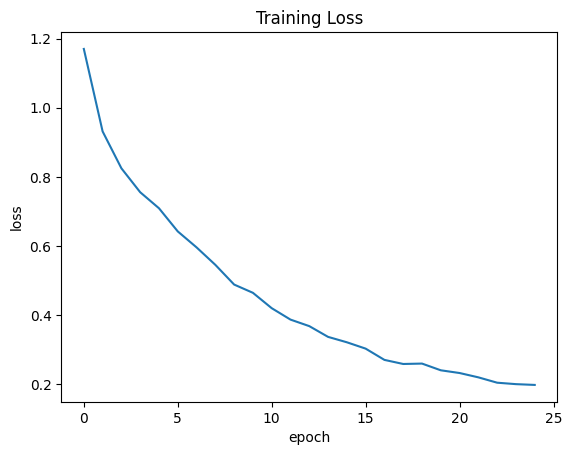

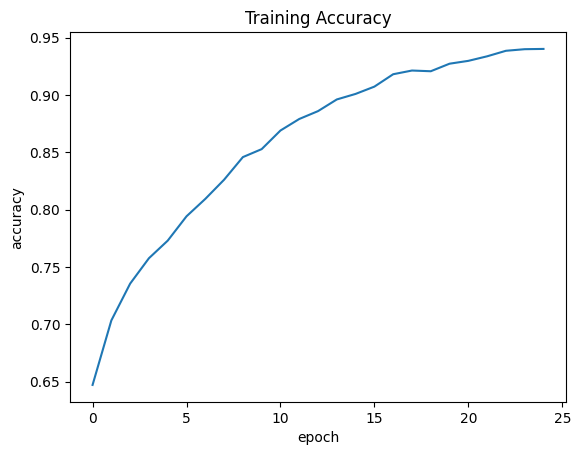

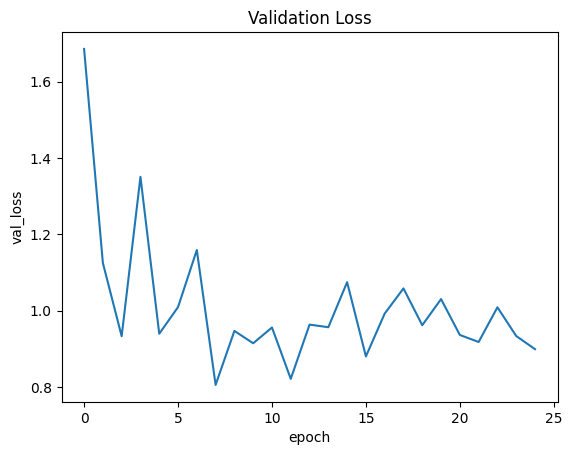

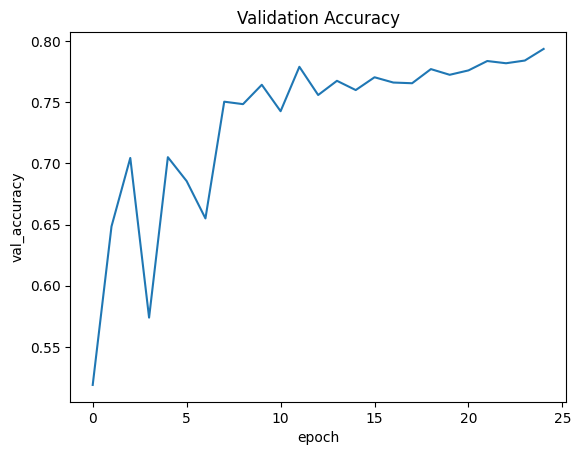

In [6]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=loss,
    metrics=["accuracy"],
)

history = model.fit(train_dataset, validation_data=val_dataset, epochs=25)

plt.plot(history.history["loss"])
plt.title("Training Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["accuracy"])
plt.title("Training Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["val_loss"])
plt.title("Validation Loss")
plt.ylabel("val_loss")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["val_accuracy"])
plt.title("Validation Accuracy")
plt.ylabel("val_accuracy")
plt.xlabel("epoch")
plt.show()

In [7]:
# Loading the Colormap
colormap = loadmat(
    "./instance-level_human_parsing/instance-level_human_parsing/human_colormap.mat"
)["colormap"]
colormap = colormap * 100
colormap = colormap.astype(np.uint8)


def infer(model, image_tensor):
    predictions = model.predict(np.expand_dims((image_tensor), axis=0))
    predictions = np.squeeze(predictions)
    predictions = np.argmax(predictions, axis=2)
    return predictions


def decode_segmentation_masks(mask, colormap, n_classes):
    r = np.zeros_like(mask).astype(np.uint8)
    g = np.zeros_like(mask).astype(np.uint8)
    b = np.zeros_like(mask).astype(np.uint8)
    for l in range(0, n_classes):
        idx = mask == l
        r[idx] = colormap[l, 0]
        g[idx] = colormap[l, 1]
        b[idx] = colormap[l, 2]
    rgb = np.stack([r, g, b], axis=2)
    return rgb


def get_overlay(image, colored_mask):
    image = tf.keras.utils.array_to_img(image)
    image = np.array(image).astype(np.uint8)
    overlay = cv2.addWeighted(image, 0.35, colored_mask, 0.65, 0)
    return overlay


def plot_samples_matplotlib(display_list, figsize=(5, 3)):
    _, axes = plt.subplots(nrows=1, ncols=len(display_list), figsize=figsize)
    for i in range(len(display_list)):
        if display_list[i].shape[-1] == 3:
            axes[i].imshow(tf.keras.utils.array_to_img(display_list[i]))
        else:
            axes[i].imshow(display_list[i])
    plt.show()


def plot_predictions(images_list, colormap, model):
    for image_file in images_list:
        image_tensor = read_image(image_file)
        prediction_mask = infer(image_tensor=image_tensor, model=model)
        prediction_colormap = decode_segmentation_masks(prediction_mask, colormap, 20)
        overlay = get_overlay(image_tensor, prediction_colormap)
        plot_samples_matplotlib(
            [image_tensor, overlay, prediction_colormap], figsize=(18, 14)
        )

1/1 [==============================] - 4s 4s/step


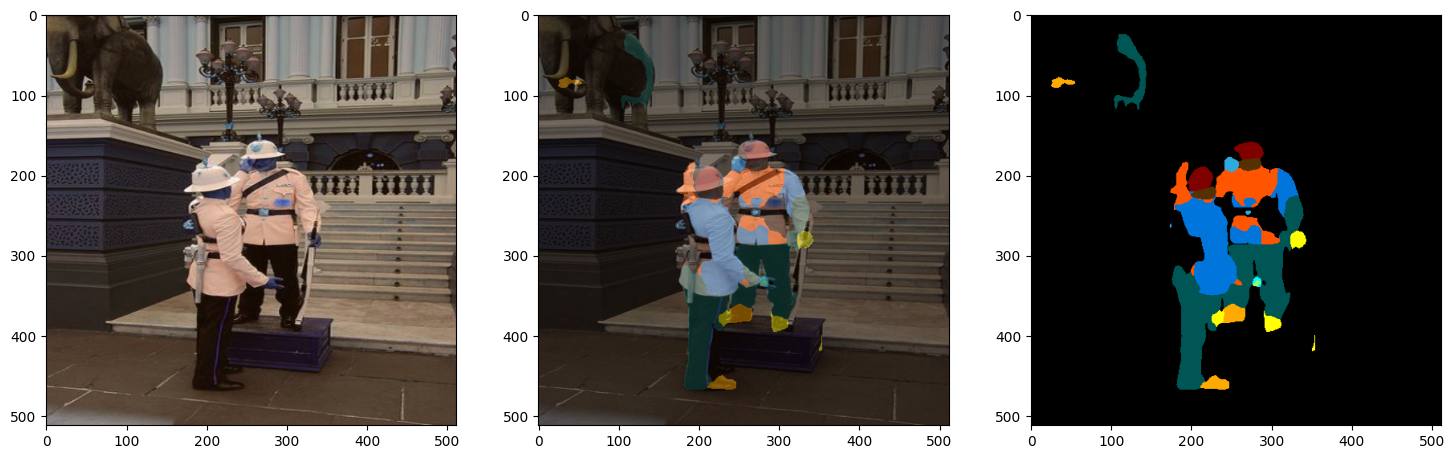

1/1 [==============================] - 0s 66ms/step


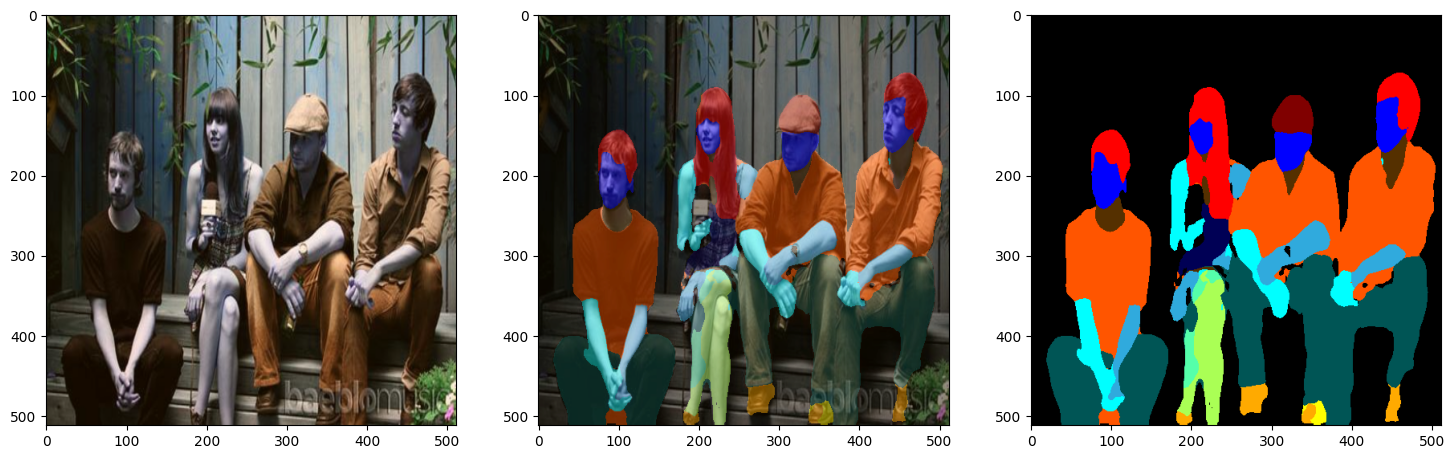

1/1 [==============================] - 0s 74ms/step


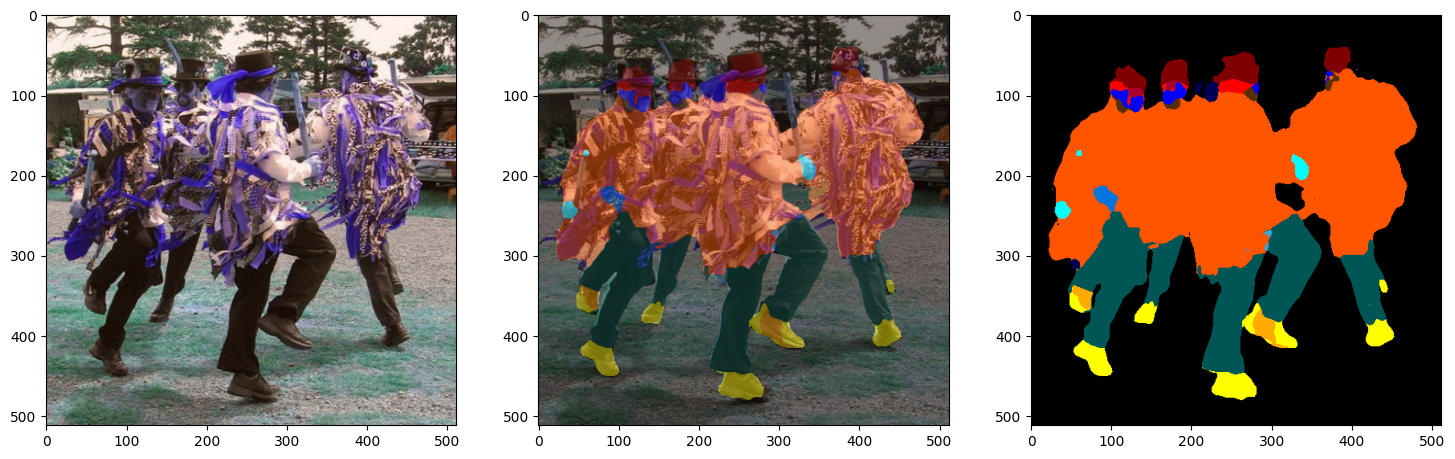

1/1 [==============================] - 0s 77ms/step


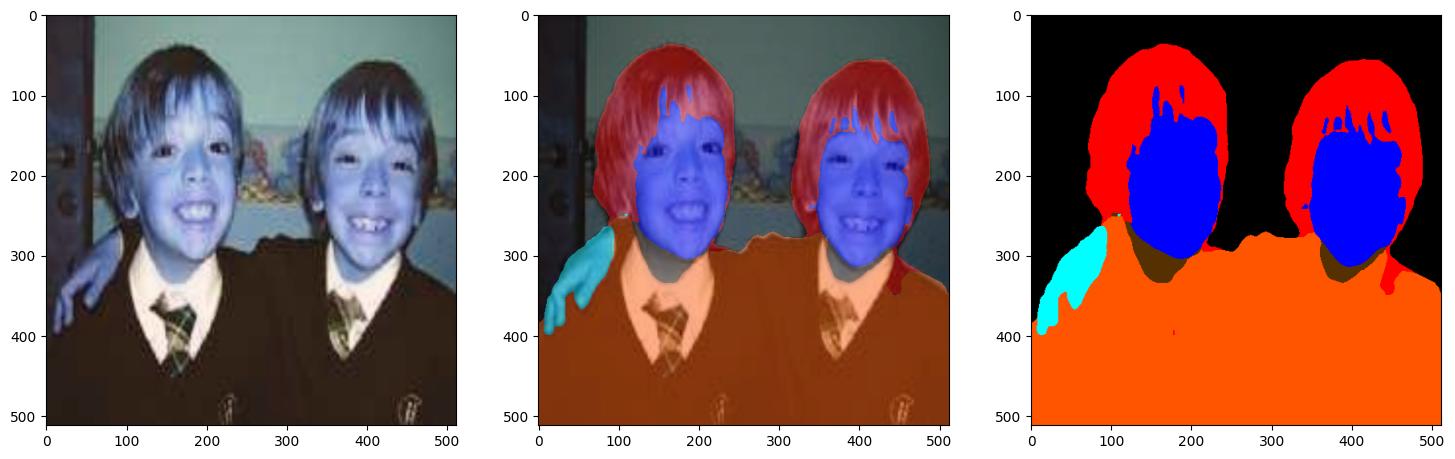

In [8]:
plot_predictions(train_images[:4], colormap, model=model)